In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from scipy.integrate import ode 
from numpy import log10 as lg
from numpy import pi as pi
from numpy import sin as sin
from numpy import cos as cos
from numpy import tan as tan
from scipy.interpolate import interp1d as sp_interp1d
from astropy import constants as const
from astropy import units as u
import math
from math import radians as radian
from numpy import linalg as LA
from scipy.special import ellipj
from numpy import e as e
import scipy.integrate as integrate
from scipy.optimize import fsolve
from scipy.integrate import quad, dblquad
from scipy.interpolate import splev, splrep
'''customize the plot '''
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.close()

G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
kb=const.k_B.cgs.value
m_n=const.m_n.cgs.value
km=10**5
yr=(1.0*u.yr).cgs.value
e=const.e.esu.value
me=const.m_e.cgs.value
mp=const.m_p.cgs.value

# Test the geometry with Dong Lai's work

Text(0.5, 0, '$\\rm Phase$')

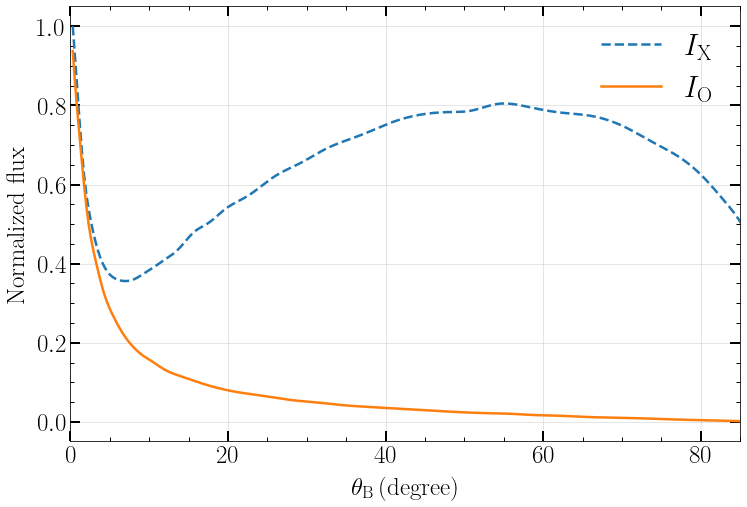

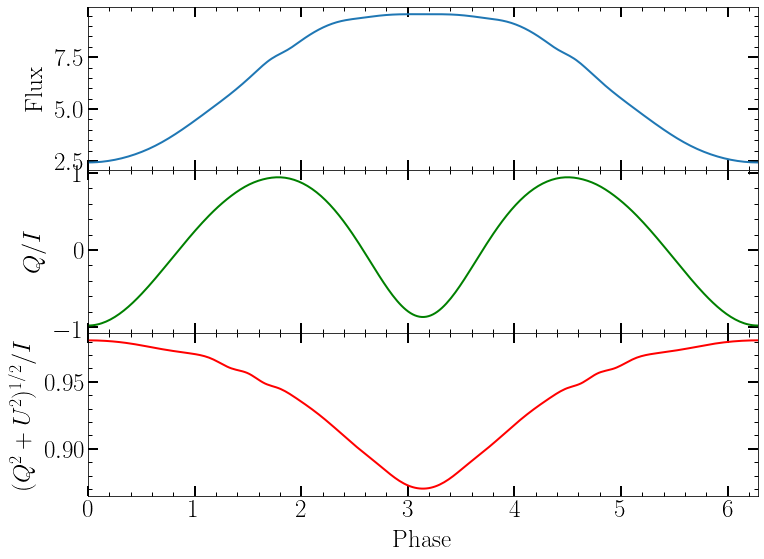

In [3]:
flux=np.genfromtxt('plus.txt',delimiter=',')
x=flux[:,0]
y=flux[:,1]
degree=np.genfromtxt('pl.txt',delimiter=',')
x1=degree[:,0]
y1=degree[:,1]
d2f=sp_interp1d(x, y,kind='cubic')
d2d=sp_interp1d(x1, y1,kind='cubic')
a=max(min(x),min(x1))
b=min(max(x),max(x1))
x3=np.linspace(a,b,300)

I_total=d2f(x3)
PL=d2d(x3)
I_minus=PL * I_total
Ix=(I_total+I_minus)/2
Io=(I_total-I_minus)/2

Xmode=sp_interp1d(x3, Ix)
Omode=sp_interp1d(x3, Io)

plt.figure(figsize=(12,8))
stan=max(max(Io),max(Ix))
plt.plot(x3,Ix/stan,linestyle='dashed',linewidth=2.5,label=r'$I_{\rm X}$')
plt.plot(x3,Io/stan,linewidth=2.5,label=r'$I_{\rm O}$')
plt.xlim(0,85)
plt.minorticks_on()
plt.grid(alpha=0.4)
plt.legend(frameon=False,fontsize=30)
plt.xlabel(r'$\theta_{\rm B}\,(\rm degree)$',fontsize=25)
plt.ylabel(r'$\rm Normalized\ flux$',fontsize=25)


def T2t(T):
    
    ratio=2*G*1.4*Ms/c**2 /km /12
    
    return np.arccos(ratio + (1-ratio)*cos(T))


# ratio=2*G*1.4*Ms/c**2 /km /10
# def integrand(u, alpha):
#     return (1/sin(alpha)**2 * (1-ratio) - u**2 * (1-u*ratio)) ** (-0.5)

# alpha=np.linspace(radian(0),radian(90),521)
# psi=np.zeros(alpha.size)
# for i in range(alpha.size):
#     psi[i]=integrate.quad(integrand,0,1,args=(alpha[i]))[0]
# critic=cos(psi[-1])
# print(critic)
# print(psi[-1])
# psi=psi[np.argsort(psi)]
# spl=splrep(psi,alpha)

# def psi2alpha(x):
    
#     return splev(x, spl,der=0,ext=1)


alpha=radian(70)
i=radian(30)
P=2
omega=2*pi/P
t=np.linspace(0,2,300)
Phi=omega*t
cosTheta=cos(i)*cos(alpha)-sin(i)*sin(alpha)*cos(Phi)
Theta=np.arccos(cosTheta)
theta=T2t(Theta)
Ix1=np.zeros(theta.size)
Io1=np.zeros(theta.size)

for i in range(len(theta)):
    Ix1[i]=Xmode(theta[i]/pi*180)*cos(theta[i])
    Io1[i]=Omode(theta[i]/pi*180)*cos(theta[i])
    
    
Psi=np.arctan2(sin(alpha)*sin(Phi), (sin(i)*cos(alpha)+cos(i)*sin(alpha)*cos(Phi)))


FI=(Ix1+Io1)

FQ=(Io1-Ix1)*cos(2*Psi)

FU=(Io1-Ix1)*sin(2*Psi)

PL=(FQ**2+FU**2)**0.5/FI

fig, (ax1,ax2,ax3)=plt.subplots(3,1, figsize=(12,9), \
                            gridspec_kw={'height_ratios': [1, 1, 1]},sharex=True)
plt.subplots_adjust(hspace=0)

ax1.plot(Phi,FI*100,linewidth=2)
ax2.plot(Phi,FQ/FI,linewidth=2,color='green')
ax3.plot(Phi,(FQ**2+FU**2)**(0.5)/FI,linewidth=2,color='red')
plt.xlim(0,2*pi)
ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
# ax2.set_ylim(-0.24,0.22)
ax1.set_ylabel(r"$\rm Flux$",fontsize=25)
ax2.set_ylabel(r"$Q/I$",fontsize=25)
ax3.set_ylabel(r"$(Q^{2}+U^{2})^{1/2}/I$",fontsize=25)
ax3.set_xlabel(r"$\rm Phase$",fontsize=25)

# Test of numerical integration

In [16]:
from scipy.integrate import cumtrapz
from scipy.integrate import simpson
x = np.linspace(0, 2, num=20)
y = x
simpson(y, x)

1.9999999999999998